In [7]:
import pandas as pd
df = pd.read_csv('/kaggle/input/car-evaluation/car_evaluation.csv')

In [8]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df.shape

(1727, 7)

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [12]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [13]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print (df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [14]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
X = df.drop(['class'],axis=1)
y = df['class']

In [31]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med


In [69]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


In [33]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [35]:
import category_encoders as ce
ce.

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [36]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [98]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [99]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [100]:
y_pred_gini = clf_gini.predict(X_test)

In [101]:
y_pred_gini

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc'

In [102]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7688


In [103]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7922


[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 2.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.5, 0.125, 'gini = 0.523\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.633\nsamples = 314\nvalue = [171, 54, 49, 40]')]

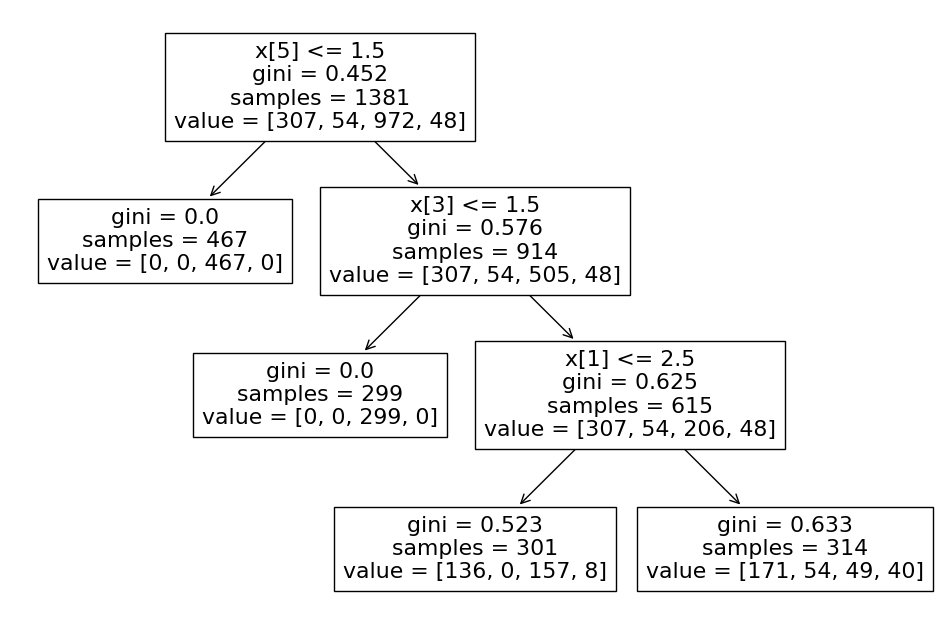

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.80      0.71      0.75        77
        good       0.36      1.00      0.53        15
       unacc       0.97      0.96      0.96       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.86       346
   macro avg       0.53      0.67      0.56       346
weighted avg       0.85      0.86      0.85       346



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Finding best Hyper Parameter -- depth

In [43]:
import numpy as np
np.arange(1,6)

array([1, 2, 3, 4, 5])

In [65]:
#define parameters

param = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best', 'random'],
    'max_depth':np.arange(1,6),
    'random_state':[0]
       }

In [66]:
from sklearn.model_selection import RepeatedKFold
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [67]:
from sklearn.model_selection import GridSearchCV

#define model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier();

# define search
search = GridSearchCV(model, param, n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train, y_train);

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_);

Best Score: 0.8382854601580075
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'random_state': 0, 'splitter': 'best'}


# Fix Imbalance

## Under Sampling

In [73]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("Before undersampling:", Counter(y_train))
print("After undersampling: ", Counter(y_train_under))

Before undersampling: Counter({'unacc': 972, 'acc': 307, 'good': 54, 'vgood': 48})
After undersampling:  Counter({'acc': 307, 'good': 54, 'unacc': 48, 'vgood': 48})


In [83]:
clf_under_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

clf_under_gini.fit(X_train_under,y_train_under)

y_pred_under_gini = clf_under_gini.predict(X_test)



In [140]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_under_gini)))

#slight increase from 76 to 78
# changing max depth from 3 to 5 , changed to .83

Model accuracy score with criterion gini index: 0.8382


In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_under_gini))

              precision    recall  f1-score   support

         acc       0.68      0.82      0.75        77
        good       0.36      1.00      0.53        15
       unacc       1.00      0.89      0.94       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.84       346
   macro avg       0.51      0.68      0.55       346
weighted avg       0.85      0.84      0.84       346



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Oversampling with SMOTE

In [129]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("Before oversampling:", Counter(y_train))
print("After oversampling: ", Counter(y_train_SMOTE))

Before oversampling: Counter({'unacc': 972, 'acc': 307, 'good': 54, 'vgood': 48})
After oversampling:  Counter({'unacc': 972, 'acc': 972, 'vgood': 972, 'good': 972})


In [117]:
clf_over_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

clf_over_gini.fit(X_train_SMOTE,y_train_SMOTE)

y_pred_SMOTE_gini= clf_over_gini.predict(X_test)


In [118]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_SMOTE_gini)))

#decrease to 62% , from 76%
# changing max depth from 3 to 5 , not much improvement 0.75

Model accuracy score with criterion gini index: 0.7601


## Combination of Under and Over Sampling (Hybrid)

In [132]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
clf_hybrid_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
over = SMOTE()
under = RandomUnderSampler(sampling_strategy="majority")
steps = [('o', over), ('u', under), ('model', clf_hybrid_gini)]
pipeline = Pipeline(steps=steps)

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean

# evaluate pipeline
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1);
score = mean(scores);
print('Accuracy score for the combined sampling method: %.3f' % score)

# not a great accuracy with Hybrid

Accuracy score for the combined sampling method: 0.747


# Conclusion

## Hyper Parameter - max_depth = 5 and Under sampling produced best result out of all